# Sparse Hebbian Learning : testing two different learning rates strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'learning-rates'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, n_iter=2**10, record_each=16, 
            homeo_method='HAP', homeo_params=dict(eta_homeo=0.05, alpha_homeo=0.02),
            learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.14s.


## fixed learning rate

No cache found /tmp/data_cache/learning-rates_fixed_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)
Iteration  103 /   1024 (elapsed time:  84s,  1.0mn)
Iteration  206 /   1024 (elapsed time:  155s,  2.0mn)
Iteration  309 /   1024 (elapsed time:  232s,  3.0mn)
Iteration  412 /   1024 (elapsed time:  306s,  5.0mn)
Iteration  515 /   1024 (elapsed time:  389s,  6.0mn)
Iteration  618 /   1024 (elapsed time:  460s,  7.0mn)
Iteration  721 /   1024 (elapsed time:  535s,  8.0mn)
Iteration  824 /   1024 (elapsed time:  602s,  10.0mn)
Iteration  927 /   1024 (elapsed time:  659s,  10.0mn)
Learning code... done (total time:  718s,  12.0mn)
done in 718.82s.


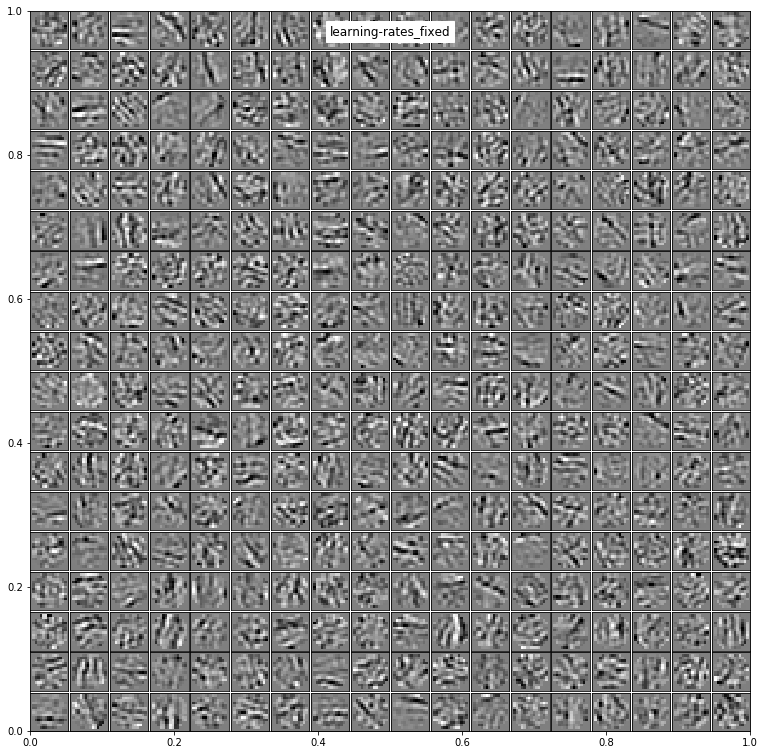

In [4]:
matname = tag + '_fixed'
shl = SHL(eta=0.01, **opts)
dico_fixed = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## ADAM

See https://arxiv.org/pdf/1412.6980.pdf

No cache found /tmp/data_cache/learning-rates_ADAM_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   1024 (elapsed time:   1s,  0.0mn)
Iteration  103 /   1024 (elapsed time:  71s,  1.0mn)
Iteration  206 /   1024 (elapsed time:  134s,  2.0mn)
Iteration  309 /   1024 (elapsed time:  200s,  3.0mn)
Iteration  412 /   1024 (elapsed time:  263s,  4.0mn)
Iteration  515 /   1024 (elapsed time:  333s,  5.0mn)
Iteration  618 /   1024 (elapsed time:  396s,  6.0mn)
Iteration  721 /   1024 (elapsed time:  465s,  7.0mn)
Iteration  824 /   1024 (elapsed time:  528s,  8.0mn)
Iteration  927 /   1024 (elapsed time:  589s,  9.0mn)
Learning code... done (total time:  650s,  10.8mn)
done in 650.25s.


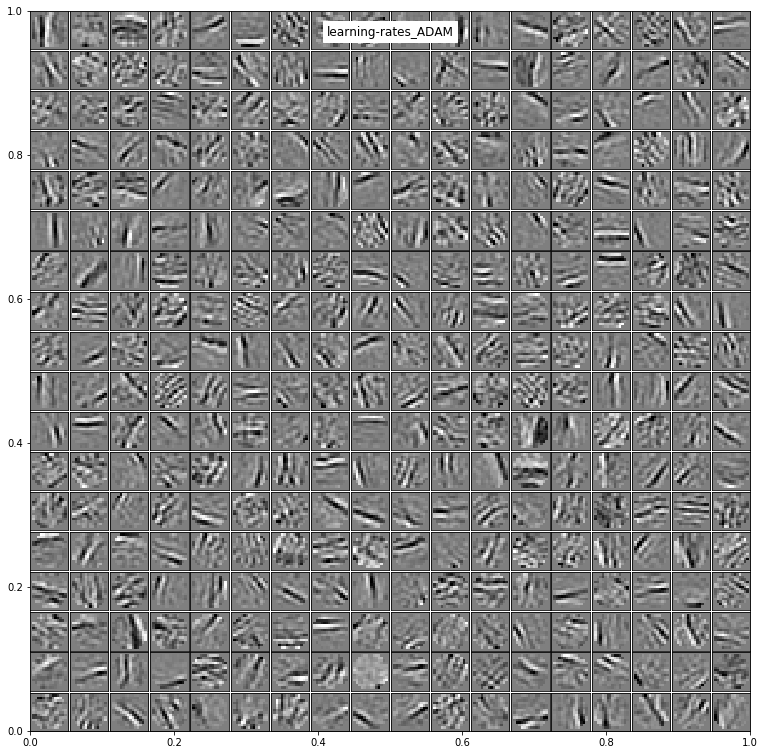

In [5]:
matname = tag + '_ADAM'
shl = SHL(eta=dict(eta=.002, beta1=.9, beta2=.999, epsilon=1.e-8), **opts)
dico_adam = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

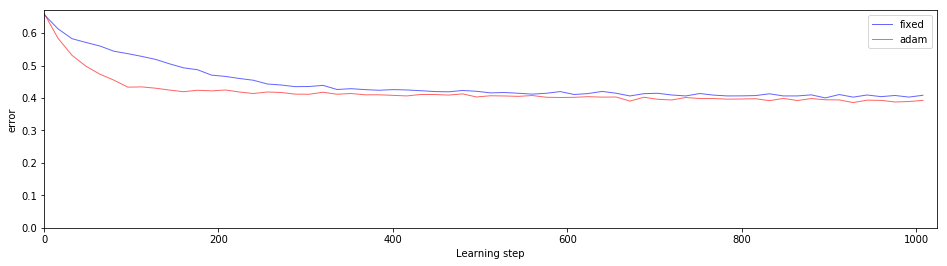

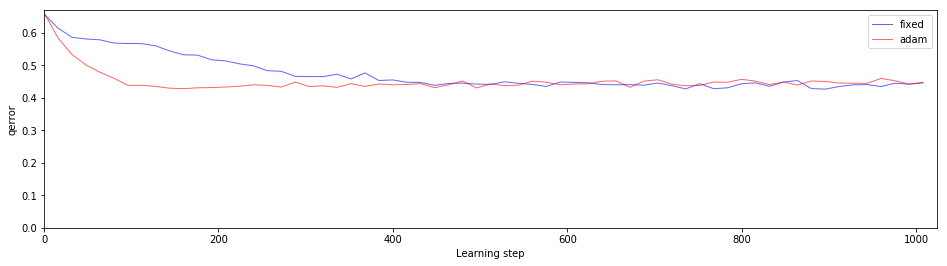

In [6]:
for variable in ['error', 'qerror']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_fixed, variable=variable, fig=fig_error, ax=ax_error, color='blue', label='fixed')
    fig_error, ax_error = shl.time_plot(dico_adam, variable=variable, fig=fig_error, ax=ax_error, color='red', label='adam')
    #ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();